# Libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from __future__ import print_function

# Versions

In [2]:
!python --version

Python 2.7.13 :: Anaconda 4.4.0 (x86_64)


In [3]:
items = [("Numpy", np), ("Pandas", pd), ("Matplotlib", matplotlib), ("Seaborn", sns)]
for item in items:
    print(item[0] + " version: " + str(item[1].__version__))

Numpy version: 1.13.0
Pandas version: 0.20.1
Matplotlib version: 2.0.2
Seaborn version: 0.7.1


# Get Data

In [4]:
# Read from disk
data = pd.read_hdf('/Users/davidziganto/Repositories/Synthetic_Dataset_Generation/data/simulated_messy_data.h5', 'table')

# EDA

Many issues can arise in datasets. Some of the more common issues include inappropriate data types, missing values, outliers, and data entry mistakes. Let's check for the following:

* Infinite (inf) values
* Missing values
* Outliers
* Data entry mistakes

## [1] Check For Inf

In [5]:
inf_indx = np.where(data==np.inf)
inf_indx

(array([3492]), array([9]))

### [1.1] Replace Inf w/NaN

In [6]:
# Replace w/NaN as setup to get mean
data.iloc[inf_indx[0], inf_indx[1]] = np.nan

## [2] Check For Missing Values

In [7]:
data.isnull().sum()

degree        0
age           0
gender        0
major         0
gpa           0
experience    1
bootcamp      0
github        1
blogger       0
articles      1
hired         0
dtype: int64

In [8]:
np.where(data.isnull())

(array([  32,  128, 3492]), array([7, 5, 9]))

### [2.1] Replace Missing Values w/Avg Value

In [9]:
data.fillna(value=data.mean(), inplace=True).head()

,degree,age,gender,major,gpa,experience,bootcamp,github,blogger,articles,hired
0,1,25,1,5,1.90,6.0,0,15.0,0,0.0,1
1,1,21,0,0,2.68,2.0,0,17.0,0,0.0,1
2,0,45,1,6,3.49,1.0,0,20.0,1,12.0,1
3,3,54,1,5,2.47,24.0,1,6.0,0,0.0,0
4,0,51,1,7,2.08,2.0,0,5.0,1,5.0,1


#### Double-Check

In [10]:
data.isnull().sum()

degree        0
age           0
gender        0
major         0
gpa           0
experience    0
bootcamp      0
github        0
blogger       0
articles      0
hired         0
dtype: int64

# Boxplot (Original)

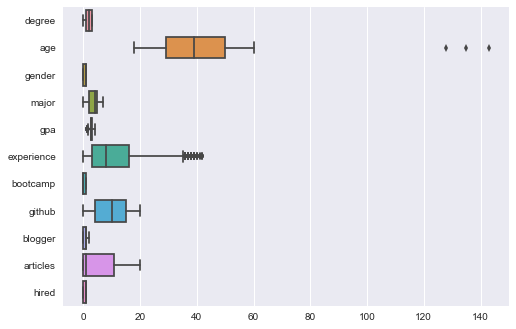

In [11]:
sns.boxplot(data=data, orient='h');

The boxplot clearly shows some outliers within the age category. We should investigate all discrete features and address the outliers.

### [2.2] Check Discrete Features Within Specified Ranges

#### Check That *Degree* In Range [0,3]

In [12]:
np.sort(data.degree.unique())

array([0, 1, 2, 3])

#### Check That *Age* In Range [18,60]

In [13]:
data.age.unique < 18

False

In [14]:
data.age.unique > 60

True

There is at least one age greater than 60. Let's see how many and what the values are.

In [15]:
data.iloc[np.where(data.age > 60)]  ## get age values that are outliers

,degree,age,gender,major,gpa,experience,bootcamp,github,blogger,articles,hired
128,1,135,0,7,2.59,10.580916,0,19.0,1,4.0,1
2943,0,143,1,2,2.30,6.000000,0,2.0,0,0.0,0
4098,0,128,1,0,2.42,21.000000,1,2.0,0,0.0,0


#### Delete Rows w/Age Outliers

In [16]:
data = data[data.age <= 60]

#### Check That *Gender* Is 0 or 1

In [17]:
np.sort(data.gender.unique())

array([0, 1])

#### Check That *Major* Is In Range 0 or 7

In [18]:
np.sort(data.major.unique())

array([0, 1, 2, 3, 4, 5, 6, 7])

#### Check That *GPA* In Range [1.0, 4.0]

In [19]:
data.gpa.unique < 1.0

False

In [20]:
data.gpa.unique > 4.0

True

In [21]:
data.gpa.iloc[np.where(data.gpa > 4.0)]  ## get gpa values that are data entry errors

860    4.21
Name: gpa, dtype: float64

#### Delete Row w/GPA Error

In [22]:
data = data[data.gpa <= 4.0]

#### Check That *Bootcamp* Is 0 or 1

In [23]:
np.sort(data.bootcamp.unique())

array([0, 1])

#### Check That *Blogger* is 0 or 1

In [24]:
np.sort(data.blogger.unique())

array([0, 1, 2])

In [25]:
data.iloc[np.where(data.blogger == 2)]  ## get gpa values that are data entry errors

,degree,age,gender,major,gpa,experience,bootcamp,github,blogger,articles,hired
3092,2,32,0,6,3.73,6.0,1,7.0,2,14.0,1
3772,2,45,1,0,1.89,8.0,1,18.0,2,17.0,0


#### Delete Rows w/Blog Data Entry Error

In [26]:
data = data[data.blogger != 2]

# Check Class Balance

In [27]:
round(data.hired.mean(), 3)

0.69

# Boxplot (Clean)

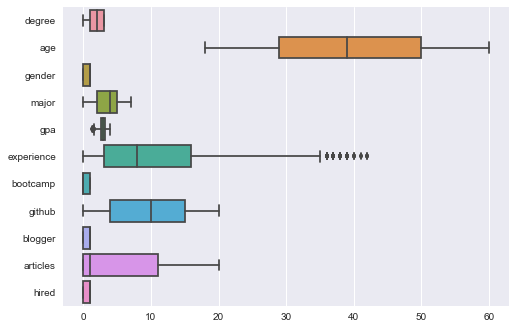

In [28]:
sns.boxplot(data=data, orient='h');

# Describe() DF

In [29]:
data.describe()

,degree,age,gender,major,gpa,experience,bootcamp,github,blogger,articles,hired
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,1.517821,39.252303,0.500801,3.521426,2.895184,10.582899,0.490989,9.752453,0.504205,5.441018,0.690228
std,1.119973,12.398113,0.500049,2.273340,0.487555,9.541084,0.499969,6.036010,0.500032,6.790547,0.462446
min,0.000000,18.000000,0.000000,0.000000,1.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,0.000000,2.000000,2.560000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,2.000000,39.000000,1.000000,4.000000,2.900000,8.000000,0.000000,10.000000,1.000000,1.000000,1.000000
75%,3.000000,50.000000,1.000000,5.000000,3.237500,16.000000,1.000000,15.000000,1.000000,11.000000,1.000000
max,3.000000,60.000000,1.000000,7.000000,4.000000,42.000000,1.000000,20.000000,1.000000,20.000000,1.000000


# Pair Plots

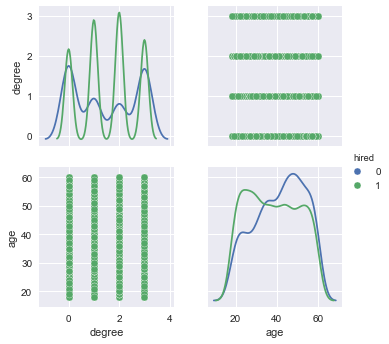

In [ ]:
sns.pairplot(data, vars=["degree","age"], hue="hired", diag_kind='kde');

There is strong separation amongst the degree variable. We see strong signals for the 2nd and 3rd degrees. It also appears that younger candidates are more likely to get hired. Keep in mind that age is correlated with experience. In this dataset, experience is one of the primary drivers whereas age has no impact. It just so happens that age looks to be a strong predictor because of its correlation with experience. In other words, younger people tend to have less experience. 

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(data, 
             vars=['degree','age','gender','major','gpa','experience','bootcamp','github','blogger','articles'],
             hue="hired", 
             diag_kind="kde");

# Discussion

As we already know, there are five key predictors: degree, experience, bootcamp, github, blogger. What follows is a discussion of what we see in the pair plot in relation to how we know the data was generated.

Let's start with degree. We know that InstaFace (IF) highly skews its hiring decision to candidates with a Bachelor's (1) or Master's (2). This is evident in the pair plot. Notice that there is clear separation between the blue curve (not hired) and the green curve (hired) when observing the degree-degree plot. The signal is very clear.

Now for age. We know that age had no intentional predictive power. What do we see in the pair plot? In the age-age plot, we actually see a fairly strong signal that shows IF skews towards hiring younger candidates. This should come as no surprise when you think about it. Age is correlated with experience and experience is a key predictor. This is an expected outcome, though one that may fool modelers and/or certain machine learning algorithms.

The gender-gender plot shows no real difference in whether a candidate will be hired. This should come as no shock since gender is independent of the hiring decision.

On to the major-major plot. There is no clear signal as expected. 

GPA exhibits no clear signal. Also expected given how the data was generated.

Experience is a strong predictor. We see this in the experience-experience plot. As expected, IF skews towards hiring less experienced candidates. That is clearly evident in the plot.

Bootcamp experience, another key predictor, shows signal. There is no real difference between those that get hired and those that don't when comparing candidates with no bootcamp experience. On the other hand, the story is quite different when candidates do have bootcamp experience. We see that having bootcamp experience makes a significant impact in the hiring decision, evinced by the large gap between hired and not hired given bootcamp experience.

More github projects tends to equate with better odds of getting hired. That sigal is clear in the plot.

Whether one is a blogger, another predictor, shows clear signal in whether one gets hired. Similar explanation as bootcamp experience.

Lastly, we come to number of blog articles written. The not hired and hired lines are nearly overlapping. This makes it clear that there is no strong signal here. Completely expected given how the data was generated.

# Correlation Matrix

In [ ]:
data.corr()

# Feature Importances

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = deepcopy(data)
y = X.pop('hired')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=50, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_split=1e-07, 
                                 init=None, 
                                 random_state=123, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto')

gbc.fit(X_train, y_train)

features = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices])
plt.xlabel('Relative Importance');

# Write To Disk

In [ ]:
# Write to disk
data.to_hdf('/Users/davidziganto/Repositories/Synthetic_Dataset_Generation/data/simulated_cleaned_data.h5',
            'table',
            mode='w', 
            append=True, 
            complevel=9, 
            complib='blosc', 
            fletcher32=True)